# Chatbots con [OpenAI](https://platform.openai.com/docs/api-reference)

https://platform.openai.com/usage

In [1]:
from openai import OpenAI
from dotenv import load_dotenv
import os

In [2]:
# Cargar variables desde el archivo .env
load_dotenv()

# Acceder a las variables
openai = OpenAI(api_key=os.getenv('OPENAI_API'))

## [Costos](https://openai.com/pricing) [tokenización](https://platform.openai.com/tokenizer)



Ada-(La más rápida) $0.0004 / 1K tokens Es el más rápido de los modelos enumerados, es una opción rentable para aplicaciones donde la velocidad es un factor crítico, como en aplicaciones de servicio al cliente o chatbot.

Babbage $0.0005 / 1K tokens Es un poco más lento que Ada, pero aun así ofrece una opción rápida y eficiente para tareas de procesamiento de lenguaje natural.

Curie $0.0020 / 1K tokens Es más caro que Ada y Babbage. Sin embargo, ofrece capacidades más avanzadas que los modelos más rápidos, lo que lo convierte en una buena opción para aplicaciones que requieren un procesamiento más complejo.

Davinci (el más poderoso) $0.0200 / 1K tokens El modelo más poderoso de la lista es Davinci, que ofrece las capacidades más avanzadas para tareas de procesamiento de lenguaje natural. Sin embargo, es la opción más cara de la lista. Es ideal para aplicaciones donde la precisión y las respuestas matizadas son fundamentales, como en escenarios complejos de atención al cliente o proyectos de investigación. . Ejemplo de calculo del reto: Le pregunte a chat gpt: Menciona las mejores arquitecturas de desarrollo de software.

## Prompt base

### Parametros de Text Completion

model: ID del modelo a utilizar.

prompt: Las solicitudes para generar finalizaciones, codificadas como una cadena, una matriz de cadenas, una matriz de tokens o una matriz de matrices de tokens.

suffix:Predeterminado a nulo El sufijo que viene después de completar el texto insertado.

max_tokens: Predeterminado a 16 El número máximo de tokens a generar en la finalización.

temperature: Predeterminado a 1 Qué temperatura de muestreo usar, entre 0 y 2. Los valores más altos, como 0,8, harán que la salida sea más aleatoria, mientras que los valores más bajos, como 0,2, la harán más enfocada y determinista. Usa esto o top_p pero no ambos.

top_p: Predeterminado a 1 Una alternativa al muestreo con temperatura, llamado muestreo de núcleo, donde el modelo considera los resultados de los tokens con masa de probabilidad top_p. Por lo tanto, 0.1 significa que solo se consideran las fichas que comprenden el 10 % de la masa de probabilidad superior.

n: Predeterminado a 1 Cuántas completions generar para cada prompt. Nota: debido a que este parámetro genera muchas finalizaciones, puede consumir rápidamente su cuota de token. Úselo con cuidado y asegúrese de tener configuraciones razonables para max_tokens y stop.

stream: Predeterminado a falso Ya sea para transmitir el progreso parcial. Si se establece, los tokens se enviarán como eventos enviados por el servidor solo de datos a medida que estén disponibles, y la secuencia terminará con un mensaje de data: [DONE]. Ejemplo en python

logprobs: Si logprobs es 5, la API devolverá una lista de los 5 tokens más probables. La API siempre devolverá el logprob del token muestreado, por lo que puede haber hasta logprobs+1 elementos en la respuesta.

echo: Repita el prompt además de la finalización(Predeterm: Falso)

stop: Hasta 4 secuencias donde la API dejará de generar más tokens. El texto devuelto no contendrá la secuencia de parada.

best_of: Predeterminado a 1 Genera el mejor de completions del lado del servidor y devuelve el "mejor" (el que tiene la mayor probabilidad de registro por token). Los resultados no se pueden transmitir(stream).

user: Un identificador único que representa a su usuario final, que puede ayudar a OpenAI a monitorear y detectar abusos.

In [23]:
prompt = "¿Quien descubrió américa?"

In [30]:
response = openai.completions.create(
  model="text-davinci-003",
  prompt=prompt,
  temperature=0.8, # Definir la libertad o restricciones del modelo (0-1)
  max_tokens=60, # Buena práctica para limitar la respuesta
  top_p=1, # Porcentaje de respuestas que se quiere dar
  n=2, # Numero de respuestas que queremos que nos den
  frequency_penalty=0.5,
  presence_penalty=0
)

In [31]:
response.choices[0].text

'\n\nDescubrir América es atribuido generalmente al explorador español Cristóbal Colón. Sin embargo, este llegó a las costas del continente en 1492, lo que significa que se establecieron varios'

In [32]:
response.choices[1].text

'\n\nEl descubrimiento de América fue hecho por Cristóbal Colón en 1492.'

## Roles (ChatCompletion)

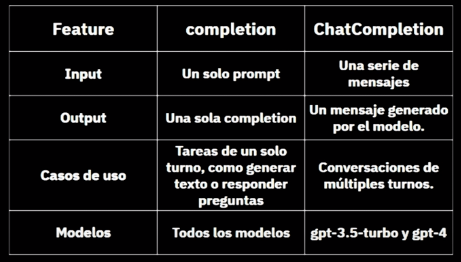

In [8]:
response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[ # Dar mensajes de ejemplo para definir el flujo
        {"role":"system", "content":"Eres un asistente virtual que da información sobre recetas de cocina"},
        {"role":"user", "content":"¿Qué tipo de postres son los más cocinados?"},
        {"role":"assistant", "content":"Los postres más populares son: Pasteles, Tartas, Galletas y Helados"},
        {"role":"user", "content":"¿De dónde se origina el helado?"}
    ]
)

In [9]:
response.choices[0].message.content

'El helado tiene una larga historia que se remonta a la antigua China, aproximadamente en el año 200 a.C. Se dice que los chinos mezclaban nieve con frutas y leche para crear una especie de postre frío. Esta técnica se fue difundiendo a través de la Ruta de la Seda y llegó a Europa en la Edad Media. Fue en Italia donde empezaron a perfeccionar el helado, añadiendo ingredientes como azúcar y vainilla. Desde entonces, el helado ha evolucionado y se ha convertido en uno de los postres más populares y versátiles en todo el mundo.'

In [10]:
response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[ # Dar mensajes de ejemplo para definir el flujo
        {"role":"system", "content":"Eres un asistente virtual que da información sobre recetas de cocina"},
        {"role":"user", "content":"¿Qué tipo de postres son los más cocinados?"},
        {"role":"assistant", "content":"Los postres más populares son: Pasteles, Tartas, Galletas y Helados"},
        {"role":"user", "content":"¿De dónde se origina el helado?"}
    ],
    temperature=0.2
)

In [11]:
response.choices[0].message.content

'El helado tiene una larga historia y su origen se remonta a la antigua China, donde se crearon las primeras versiones de helado hace más de 2,000 años. Se dice que los chinos mezclaban leche con arroz y la enfriaban con nieve para crear una especie de postre helado. Esta técnica se fue difundiendo a través de la Ruta de la Seda y llegó a Europa en la Edad Media. En Italia, se comenzaron a agregar sabores como frutas y especias, y se le dio la consistencia cremosa que conocemos hoy en día. Desde entonces, el helado se ha convertido en un postre muy popular en todo el mundo.'

## Adivinanza

In [16]:
import random

def get_clue():
    words = ["elefante", "leon", "jirafa", "hipopótamo", "mono"]
    random_word = random.choice(words)
    prompt = "Adivina la palabra en la que esto pensando. Es un animal que vive en la selva."
    return prompt, random_word

def check_answer(user_input, answer):
    return user_input == answer

def give_property(animal):
    response = openai.completions.create(
        model = "text-davinci-003",
        prompt= f"Dame una característica del tipo animal {animal}, pero jamás me digas el nombre del animal",
        max_tokens=100
    )
    return response.choices[0].text

def play_game():
    prompt, answer = get_clue()
    print(prompt)
    while True:
        user_input = input("Ingresa tu respuesta: ")
        if check_answer(user_input, answer):
            print(f"Correcto, el animal era {user_input}")
            break
        else:
            print("Respuesta incorrecta, vuelve a intentarlo")
            print(give_property(answer))

In [19]:
play_game()

Adivina la palabra en la que esto pensando. Es un animal que vive en la selva.
Respuesta incorrecta, vuelve a intentarlo


Es un animal de gran tamaño con orejas grandes y una trompa larga.
Correcto, el animal era elefante


## [Tokenizer](https://platform.openai.com/tokenizer)

En el vasto universo de las tecnologías de inteligencia artificial, el entendimiento y la optimización de costos representan un aspecto fundamental para desarrolladores y entusiastas. Los modelos de OpenAI no son la excepción. Profundizar en su funcionamiento, especialmente en la tokenización de texto, no solo es atractivo, sino esencial para la gestión eficiente de recursos. Vamos a explorar este tema con detenimiento.

¿Qué es la tokenización de texto y por qué es importante?
La tokenización de texto es un proceso clave en el uso de modelos de Inteligencia Artificial como los ofrecidos por OpenAI. Pero, ¿qué significa esto exactamente y cuál es su relevancia?

¿Cómo funciona la tokenización?
Cuando ingresamos una frase o un párrafo a la plataforma de OpenAI para procesarla con sus modelos IA, este texto se descompone en unidades conocidas como "tokens". Estos son segmentos de texto que podrían ser palabras, partes de palabras o incluso caracteres individuales. La IA utiliza un enfoque estadístico para decidir cómo realizar esta segmentación, basándose en la probabilidad de que ciertos caracteres aparezcan agrupados.

Para ello usaremos la librería [tiktoken](https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb)

In [3]:
import tiktoken

### Selección y carga de encoding

In [4]:
encoding = tiktoken.get_encoding("cl100k_base")
encoding

<Encoding 'cl100k_base'>

In [6]:
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
encoding

<Encoding 'cl100k_base'>

In [8]:
len(encoding.encode("El perrito come solito"))

7

In [9]:
def num_tokens_from_messages(messages, model="gpt-3.5-turbo-0613"):
    """Return the number of tokens used by a list of messages."""
    try:
        encoding = tiktoken.encoding_for_model(model)
    except KeyError:
        print("Warning: model not found. Using cl100k_base encoding.")
        encoding = tiktoken.get_encoding("cl100k_base")
    if model in {
        "gpt-3.5-turbo-0613",
        "gpt-3.5-turbo-16k-0613",
        "gpt-4-0314",
        "gpt-4-32k-0314",
        "gpt-4-0613",
        "gpt-4-32k-0613",
        }:
        tokens_per_message = 3
        tokens_per_name = 1
    elif model == "gpt-3.5-turbo-0301":
        tokens_per_message = 4  # every message follows <|start|>{role/name}\n{content}<|end|>\n
        tokens_per_name = -1  # if there's a name, the role is omitted
    elif "gpt-3.5-turbo" in model:
        print("Warning: gpt-3.5-turbo may update over time. Returning num tokens assuming gpt-3.5-turbo-0613.")
        return num_tokens_from_messages(messages, model="gpt-3.5-turbo-0613")
    elif "gpt-4" in model:
        print("Warning: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.")
        return num_tokens_from_messages(messages, model="gpt-4-0613")
    else:
        raise NotImplementedError(
            f"""num_tokens_from_messages() is not implemented for model {model}. See https://github.com/openai/openai-python/blob/main/chatml.md for information on how messages are converted to tokens."""
        )
    num_tokens = 0
    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":
                num_tokens += tokens_per_name
    num_tokens += 3  # every reply is primed with <|start|>assistant<|message|>
    return num_tokens


In [10]:
example_messages = [
    {
      "role": "system",
      "content": "Eres un asistente de atención a clientes y estudiantes de la plataforma de educación online en tecnología, inglés y liderazgo llamada Platzi"
    },
    {
      "role": "user",
      "content": "¿Cómo puedo mejorar mis habilidades de creación de contenido con inteligencia artificial?"
    },
    {
      "role": "assistant",
      "content": "Para mejorar tus habilidades de creación de contenido con inteligencia artificial te sugiero que tomes el Taller de Creación de Contenido con Inteligencia Artificial en https://platzi.com/cursos/contenido-ia/. En este curso aprenderás a utilizar herramientas para generar contenido de manera automatizada y eficiente. ¡No te lo pierdas!"
    }
]

In [11]:
num_tokens_from_messages(example_messages)

139

Con esta cantidad de tokens podemos estimar el [precio](https://openai.com/api/pricing/)

## Fine-tuning

El proceso de fine-tuning implica re-entrenar parcialmente el modelo pre-entrenado con el nuevo conjunto de datos, utilizando una tasa de aprendizaje más baja que la utilizada en el entrenamiento original. Esto permite que el modelo se adapte mejor a la tarea específica y a las características únicas de los datos de esa tarea en particular, sin perder completamente el conocimiento general aprendido durante su entrenamiento original.

### Reglas básicas para un correcto formato de datos para fine tuning

Cada prompt debe terminar con un separador fijo con esto el modelo entiende donde termina la solicitud \n\n###\n\n.

Cada completion debe comenzar con un espacio en blanco para un correcto proceso de tokenización.

Cada completion debe terminar con una secuencia para que el modelo entienda donde termina o finaliza el proceso \n o ###.

Se debe utilizar la misma estructura de prompt con la que fue entrenado.


El fine-tuning de un modelo de OpenAI puede tener un costo significativo. 



La tarifa de fine-tuning de los modelos de OpenAI se basa en el número de tokens usados durante el entrenamiento. 
La tarifa de uso del modelo con fine-tuning se basa en el consumo del número de tokens del texto que ingresa al modelo, y en los tokens del texto de salida generado por el modelo.

### [Preparar los datos de entrenamiento](https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset)

In [3]:
import json
import tiktoken
import numpy as np
from collections import defaultdict

In [4]:
data_path = "./data/data_train.jsonl"

In [5]:
# Cargar dataset

with open(data_path, "r", encoding="utf-8") as f:
    dataset = [json.loads(line) for line in f]

print("Numero de ejemplos:", len(dataset))
print("Primer ejemplo: ")
for message in dataset[0]["messages"]:
    print(message)

Numero de ejemplos: 1261
Primer ejemplo: 
{'role': 'system', 'content': 'Eres un asistente de atención a clientes y estudiantes de la plataforma de educación online en tecnología, inglés y liderazgo llamada Platzi'}
{'role': 'user', 'content': '¿Cómo puedo mejorar mis habilidades en JavaScript?,'}
{'role': 'assistant', 'content': 'Para mejorar tus habilidades en JavaScript, te recomendamos tomar el Curso Práctico de JavaScript en https://platzi.com/cursos/javascript-practico/. También puedes practicar en proyectos personales y buscar recursos en línea para continuar aprendiendo. ¡Mucho éxito en tu camino de aprendizaje de JavaScript!'}


### Validación de formato

In [12]:
format_errors = defaultdict(int)

for example in dataset:
    if not isinstance(example, dict):
        format_errors["data_type"] += 1
        continue
    
    messages = example.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue
    
    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_ missing_key"] += 1
        
        if any(k not in ("role", "content", "name", "function_call") for k in message):
            format_errors["message_unrecognized_key"] += 1
            
        if message.get("role", None) not in ("system", "user", "assistant", "function"):
            format_errors["unrecognized_role"] += 1
            
        content = message.get("content", None)
        function_call = message.get("function_call", None)
        
        if (not content and not function_call) or not isinstance(content, str):
            format_errors["missing_content"] += 1
            
    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["missing_assistant_message"] += 1
        
if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found!")

No errors found!


### Conteo de tokens

In [13]:
encoding = tiktoken.get_encoding("cl100k_base")

# not exact!
# simplified from https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb
def num_tokens_from_messages(messages, tokens_per_message=3, tokens_per_name=1):
    num_tokens = 0
    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":
                num_tokens += tokens_per_name
    num_tokens += 3
    return num_tokens

def num_assistant_tokens_from_messages(messages):
    num_tokens = 0
    for message in messages:
        if message["role"] == "assistant":
            num_tokens += len(encoding.encode(message["content"]))
    return num_tokens

def print_distribution(values, name):
    print(f"\n#### Distribution of {name}:")
    print(f"min / max: {min(values)}, {max(values)}")
    print(f"mean / median: {np.mean(values)}, {np.median(values)}")
    print(f"p5 / p95: {np.quantile(values, 0.1)}, {np.quantile(values, 0.9)}")

In [14]:
# Advertencias y conteo de tokens
n_missing_system = 0
n_missing_user = 0
n_messages = []
convo_lens = []
assistant_message_lens = []

for ex in dataset:
    messages = ex["messages"]
    if not any(message["role"] == "system" for message in messages):
        n_missing_system += 1
    if not any(message["role"] == "user" for message in messages):
        n_missing_user += 1
    n_messages.append(len(messages))
    convo_lens.append(num_tokens_from_messages(messages))
    assistant_message_lens.append(num_assistant_tokens_from_messages(messages))
    
print("Num examples missing system message:", n_missing_system)
print("Num examples missing user message:", n_missing_user)
print_distribution(n_messages, "num_messages_per_example")
print_distribution(convo_lens, "num_total_tokens_per_example")
print_distribution(assistant_message_lens, "num_assistant_tokens_per_example")
n_too_long = sum(l > 4096 for l in convo_lens)
print(f"\n{n_too_long} examples may be over the 4096 token limit, they will be truncated during fine-tuning")

Num examples missing system message: 0
Num examples missing user message: 0

#### Distribution of num_messages_per_example:
min / max: 3, 3
mean / median: 3.0, 3.0
p5 / p95: 3.0, 3.0

#### Distribution of num_total_tokens_per_example:
min / max: 68, 206
mean / median: 133.87946074544013, 133.0
p5 / p95: 114.0, 159.0

#### Distribution of num_assistant_tokens_per_example:
min / max: 9, 132
mean / median: 69.51704996034893, 69.0
p5 / p95: 50.0, 92.0

0 examples may be over the 4096 token limit, they will be truncated during fine-tuning


### Estimación de costos

In [15]:
# Costo y estimado de número de épocas por defecto
MAX_TOKENS_PER_EXAMPLE = 4096

TARGET_EPOCHS = 3
MIN_TARGET_EXAMPLES = 100
MAX_TARGET_EXAMPLES = 25000
MIN_DEFAULT_EPOCHS = 1
MAX_DEFAULT_EPOCHS = 25

n_epochs = TARGET_EPOCHS
n_train_examples = len(dataset)
if n_train_examples * TARGET_EPOCHS < MIN_TARGET_EXAMPLES:
    n_epochs = min(MAX_DEFAULT_EPOCHS, MIN_TARGET_EXAMPLES // n_train_examples)
elif n_train_examples * TARGET_EPOCHS > MAX_TARGET_EXAMPLES:
    n_epochs = max(MIN_DEFAULT_EPOCHS, MAX_TARGET_EXAMPLES // n_train_examples)

n_billing_tokens_in_dataset = sum(min(MAX_TOKENS_PER_EXAMPLE, length) for length in convo_lens)
print(f"Dataset has ~{n_billing_tokens_in_dataset} tokens that will be charged for during training")
print(f"By default, you'll train for {n_epochs} epochs on this dataset")
print(f"By default, you'll be charged for ~{n_epochs * n_billing_tokens_in_dataset} tokens")

Dataset has ~168822 tokens that will be charged for during training
By default, you'll train for 3 epochs on this dataset
By default, you'll be charged for ~506466 tokens
